# Data Integrity
- Quick Start: https://docs.deepchecks.com/stable/tabular/auto_tutorials/quickstarts/plot_quick_data_integrity.html
- Gallery: https://docs.deepchecks.com/stable/tabular/auto_checks/data_integrity/index.html

In [1]:
import json

import pandas as pd
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity

In [2]:
!ls data

TitanicData2.csv


In [3]:
df = pd.read_csv('data/TitanicData2.csv')
print(df.shape)
df = df[['Passenger_Id','pclass','sex','age','sibsp','parch','fare','survived']]
print(df.shape)
df.head()

(1309, 15)
(1309, 8)


,Passenger_Id,pclass,sex,age,sibsp,parch,fare,survived
0,1,3rd,male,39.0,1,5,31.2750,0
1,2,3rd,female,15.0,0,0,8.0292,1
2,3,2nd,male,26.0,1,1,29.0000,1
3,4,3rd,male,23.0,0,0,7.8542,0
4,5,3rd,male,20.0,1,0,7.9250,1


In [4]:
df.dtypes

Passenger_Id      int64
pclass           object
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
survived          int64
dtype: object

In [5]:
df.isna().sum()

Passenger_Id      0
pclass            0
sex               0
age             263
sibsp             0
parch             0
fare              1
survived          0
dtype: int64

In [6]:
df.describe()

,Passenger_Id,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,29.881135,0.498854,0.385027,33.295479,0.381971
std,378.020061,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [96]:
#df['cabin'].value_counts()

In [7]:
id_col = 'Passenger_Id'
target_col = 'survived'
#categorical_cols = ['pclass','sex','cabin']
categorical_cols = ['pclass','sex']

In [8]:
ds = Dataset(df,
            label=target_col,
            index_name=id_col,
            cat_features=categorical_cols)
print(type(ds))
ds

<class 'deepchecks.tabular.dataset.Dataset'>


Dataset Description 

 
 
 
 
 Column 
 DType 
 Kind 
 Additional Info 
 
 
 
 
 0 
 Passenger_Id 
 integer 
 Index 
 
 
 
 1 
 survived 
 integer 
 
 
 
 
 2 
 pclass 
 string 
 Categorical Feature 
 
 
 
 3 
 sex 
 string 
 Categorical Feature 
 
 
 
 4 
 age 
 floating 
 Numerical Feature 
 
 
 
 5 
 sibsp 
 integer 
 Numerical Feature 
 
 
 
 6 
 parch 
 integer 
 Numerical Feature 
 
 
 
 7 
 fare 
 floating 
 Numerical Feature 
 
 
 
 
 Dataset Content 

 
 
 
 
 Passenger_Id 
 survived 
 pclass 
 sex 
 age 
 sibsp 
 parch 
 fare 
 
 
 
 
 0 
 1 
 0 
 3rd 
 male 
 39.0 
 1 
 5 
 31.2750 
 
 
 1 
 2 
 1 
 3rd 
 female 
 15.0 
 0 
 0 
 8.0292 
 
 
 2 
 3 
 1 
 2nd 
 male 
 26.0 
 1 
 1 
 29.0000 
 
 
 3 
 4 
 0 
 3rd 
 male 
 23.0 
 0 
 0 
 7.8542 
 
 
 4 
 5 
 1 
 3rd 
 male 
 20.0 
 1 
 0 
 7.9250 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1304 
 1305 
 0 
 2nd 
 male 
 26.0 
 0 
 0 
 13.0000 
 
 
 1305 
 1306 
 1 
 1st 
 female 
 64.0 
 0 
 2 
 83.1583 
 
 
 1306 
 1307 
 1 
 1st 
 female 
 39.0 
 1 
 0 
 55.9000 
 
 
 1307 
 1308 
 0 
 2nd 
 male 
 27.0 
 0 
 0 
 26.0000 
 
 
 1308 
 1309 
 0 
 3rd 
 female 
 41.0 
 0 
 2 
 20.2125

- Dataset Object: https://docs.deepchecks.com/stable/tabular/usage_guides/dataset_object.html

In [9]:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)

In [10]:
suite_result.show()   # jupyterlabでの表示Error

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_6W0V00IFKY0D9CISSG89CRW1A">Data Integrity Sui…

In [11]:
# 結果をhtml保存
suite_result.save_as_html('DataIntegrity_output.html')

'DataIntegrity_output.html'

In [102]:
!ls | grep html

DataIntegrity_output (1).html
DataIntegrity_output (2).html
DataIntegrity_output.html


In [103]:
# 結果をjsonで取得する場合
str_json = suite_result.to_json()
print(str_json[:500])
#json.loads(str_json)  # dict形式

{"name": "Data Integrity Suite", "results": [{"type": "CheckResult", "check": {"name": "Conflicting Labels", "params": {"columns": null, "ignore_columns": null, "n_to_show": 5, "n_samples": 10000000, "random_state": 42}, "summary": "Find samples which have the exact same features' values but different labels. <a href=\"https://docs.deepchecks.com/0.18/tabular/auto_checks/data_integrity/plot_conflicting_labels.html?utm_source=display_output&utm_medium=referral&utm_campaign=check_link\" target=\"_


In [104]:
for i, res in enumerate(suite_result.get_not_passed_checks()):
    print('>>> Not Pass Test #{}'.format(i))    
    print(res)

>>> Not Pass Test #0
Conflicting Labels: {'percent_of_conflicting_samples': 0.09549274255156608, 'samples_indices': [[1057, 482, 936, 54, 1135, 215, 213, 557, 903, 652, 214, 500, 836, 750, 1015, 784, 854, 863, 337], [322, 514, 916, 846, 575, 212, 851, 782, 301, 37, 406, 1130, 860], [239, 1000, 736, 292, 643, 593, 338, 726, 586, 262], [598, 802, 815, 20], [1074, 922, 980, 64], [899, 99, 992, 1196], [490, 55, 1022, 698], [744, 394, 1165, 662], [493, 591, 217, 441], [289, 235, 993], [1049, 76, 934], [1201, 532, 421], [989, 1138, 776], [339, 25, 403], [978, 868, 459], [333, 1177, 149], [382, 84], [892, 334], [221, 1162], [625, 517], [634, 595], [193, 961], [544, 1303], [644, 136], [533, 173], [318, 669], [694, 412], [48, 344], [346, 685], [519, 1151], [361, 594], [371, 1097], [153, 1181], [23, 714], [911, 238]]}
>>> Not Pass Test #1
Identifier Label Correlation: {'Passenger_Id': 0.04997773233562442}


In [105]:
type(suite_result.get_not_passed_checks()[0])

deepchecks.core.check_result.CheckResult

### Conflicting Labels
https://docs.deepchecks.com/0.18/tabular/auto_checks/data_integrity/plot_conflicting_labels.html
- 同じ特徴量を持つが、targetが混在している

In [106]:
df.loc[[1057, 482, 936, 54, 1135, 215, 213, 557, 903, 652, 500, 836, 750, 1015, 784, 854, 863, 337]]

,Passenger_Id,pclass,sex,age,sibsp,parch,fare,survived
1057,1058,3rd,male,NaN,0,0,7.75,0
482,483,3rd,male,NaN,0,0,7.75,0
936,937,3rd,male,NaN,0,0,7.75,0
54,55,3rd,male,NaN,0,0,7.75,0
1135,1136,3rd,male,NaN,0,0,7.75,0
215,216,3rd,male,NaN,0,0,7.75,1
213,214,3rd,male,NaN,0,0,7.75,0
557,558,3rd,male,NaN,0,0,7.75,0
903,904,3rd,male,NaN,0,0,7.75,1
652,653,3rd,male,NaN,0,0,7.75,0


### Identifier Label Correlation
https://docs.deepchecks.com/0.18/tabular/auto_checks/data_integrity/plot_identifier_label_correlation.html
- IDカラムがTargetの予測に貢献できる可能性がある
- PSP(Predictive Power Score) Score: https://docs.deepchecks.com/0.18/tabular/auto_checks/train_test_validation/plot_feature_label_correlation_change.html#how-is-the-predictive-power-score-pps-calculated

In [12]:
df.columns

Index(['Passenger_Id', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'survived'],
      dtype='object')

In [14]:
df['Passenger_Id'].corr(df['survived'])

0.022993374920778367

<Axes: xlabel='Passenger_Id', ylabel='survived'>

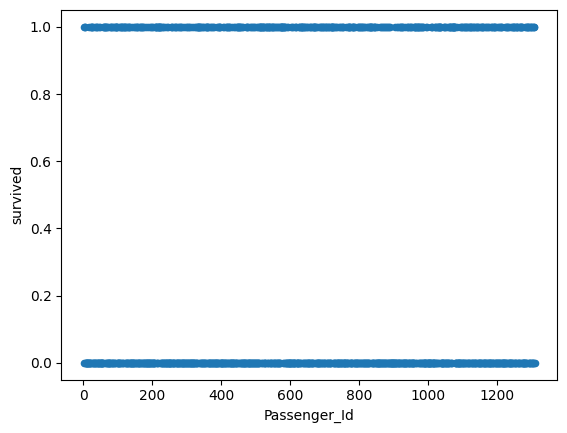

In [15]:
df.plot.scatter(x='Passenger_Id', y='survived')

In [16]:
df.groupby('survived')['Passenger_Id'].mean()

survived
0    648.169345
1    666.052000
Name: Passenger_Id, dtype: float64